# Домашнее задание № 2.6 по курсу DS

## Кластеризация

Антон Уразов

# Задание

Что делать

Обязательное задание

1. Визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку);

2. Аналогично исследовать скопления голосов за и против отдельно;

3. Подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально);

4. Загрузить ноутбук на «Гитхаб» и приложить сюда ссылку. 

 

Дополнительные задания

1. Найти наиболее активные в голосовании районы;

Подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray'

2. Для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию.

 

Откуда брать данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:

geo_comment.xlsx

comment - комментарий одного или списка жителей к проект

multiplier - количество авторов комментария (может быть 1, может быть список)

x, y - координаты адреса, по которому был дан определённой комментарий

comment_class - за (1) / против (-1)

geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть multiplier> 1 голоса)

x, y - координаты адреса, по которому был дан определённой комментарий

comment_class - за (1) / против (-1)


In [76]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [77]:
raw_data = pd.read_excel('geo.xlsx')
X = raw_data[['x','y']]
y = raw_data[['comment_class']]

In [78]:
clusters_random = np.random.randint(low=0, high=2, size=len(X))

In [79]:
def get_descr(algo_name, y, y_pred, X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

In [80]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), 
                           columns = X.columns)

## Визуально оценим исходные данные

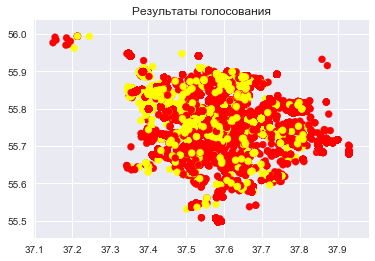

In [81]:
plt.scatter(X['x'], X['y'], c = y, cmap ='autumn');
plt.title('Результаты голосования');

# Визуально разделим город на районы безотносительно голосов

In [91]:
def calc_opt_clusters(X, max_clusters = 10):

    k_inertia = []
    ks = range(1,max_clusters+1)
    for k in ks:
        clf_kmeans = KMeans(n_clusters=k)
        clusters_kmeans = clf_kmeans.fit_predict(X, )
        k_inertia.append(clf_kmeans.inertia_)
    
    diff = np.diff(k_inertia)
    diff_r = diff[1:] / diff[:-1]
    k_opt = ks[np.argmin(diff_r)+1]
    plt.plot(ks[1:-1], diff_r)
    plt.title('Выбор оптимальгного числа кластеров')
    return k_opt

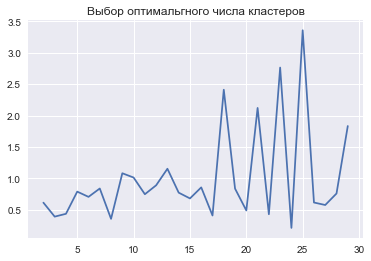

In [92]:
k_opt = calc_opt_clusters(X_scaled, max_clusters = 30)

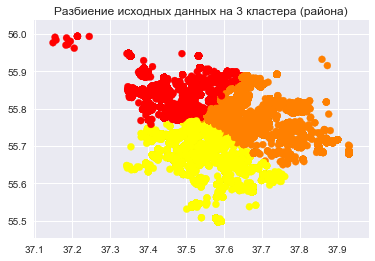

In [88]:
k1 = 3
clusters = KMeans(n_clusters = k1).fit_predict(X_scaled)
plt.scatter(X['x'], X['y'], c = clusters, cmap ='autumn');
plt.title('Разбиение исходных данных на 3 кластера (района)');

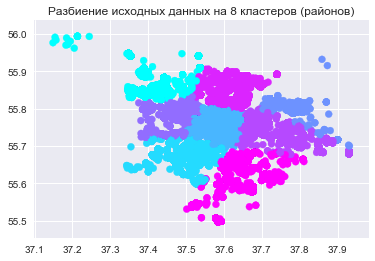

In [97]:
k2 = 8
clusters = KMeans(n_clusters = k2).fit_predict(X_scaled)
plt.scatter(X['x'], X['y'], c = clusters, cmap ='cool');
plt.title('Разбиение исходных данных на 8 кластеров (районов)');

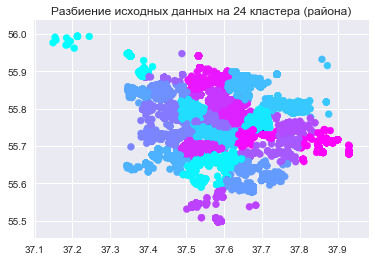

In [98]:
clusters = KMeans(n_clusters = 24).fit_predict(X_scaled)
plt.scatter(X['x'], X['y'], c = clusters, cmap ='cool');
plt.title('Разбиение исходных данных на 24 кластера (района)');

## Анализ результатов 

In [61]:
positive_X = X[y['comment_class']>0]
negative_X = X[y['comment_class']<0]


positive_X_scaled = X_scaled[y['comment_class']>0]
negative_X_scaled = X_scaled[y['comment_class']<0]



## положительные рез-ты

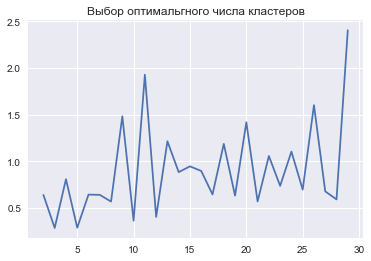

In [99]:
k_opt = calc_opt_clusters(positive_X_scaled, max_clusters = 30)

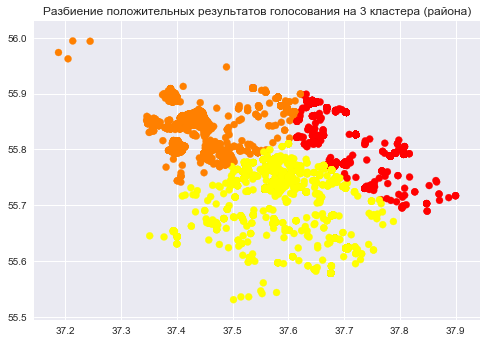

In [64]:
clusters = KMeans(n_clusters = 3).fit_predict(positive_X_scaled)
plt.scatter(positive_X['x'], positive_X['y'], c = clusters, cmap ='autumn');
plt.title('Разбиение положительных результатов голосования на 3 кластера (района)');

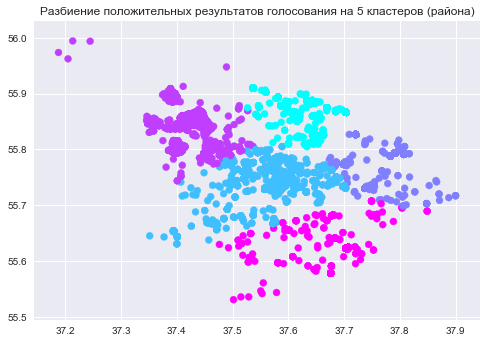

In [65]:
clusters = KMeans(n_clusters = 5).fit_predict(positive_X_scaled)
plt.scatter(positive_X['x'], positive_X['y'], c = clusters, cmap ='cool');
plt.title('Разбиение положительных результатов голосования на 5 кластеров (района)');

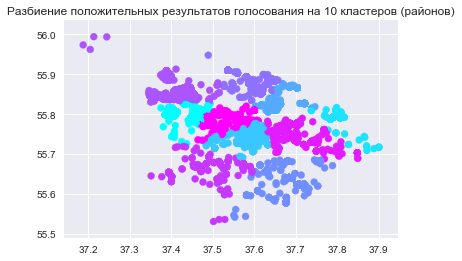

In [100]:
clusters = KMeans(n_clusters = 10).fit_predict(positive_X_scaled)
plt.scatter(positive_X['x'], positive_X['y'], c = clusters, cmap ='cool');
plt.title('Разбиение положительных результатов голосования на 10 кластеров (районов)');

## Отрицательные рез-ты

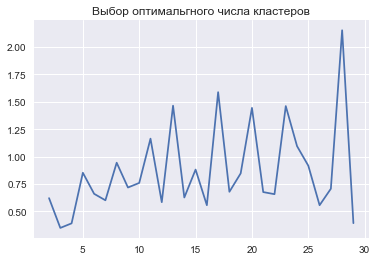

In [101]:
k_opt = calc_opt_clusters(negative_X_scaled, max_clusters = 30)

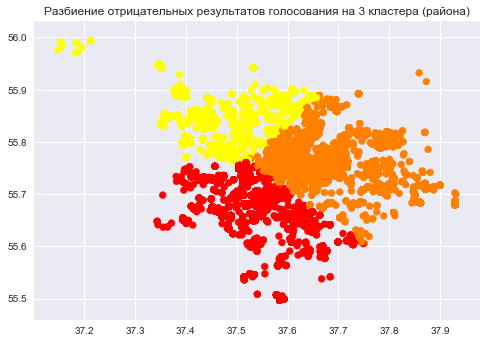

In [67]:
clusters = KMeans(n_clusters = 3).fit_predict(negative_X_scaled)
plt.scatter(negative_X['x'], negative_X['y'], c = clusters, cmap ='autumn');
plt.title('Разбиение отрицательных результатов голосования на 3 кластера (района)');

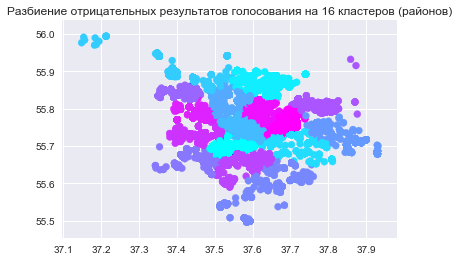

In [102]:
clusters = KMeans(n_clusters = 16).fit_predict(negative_X_scaled)
plt.scatter(negative_X['x'], negative_X['y'], c = clusters, cmap ='cool');
plt.title('Разбиение отрицательных результатов голосования на 16 кластеров (районов)');

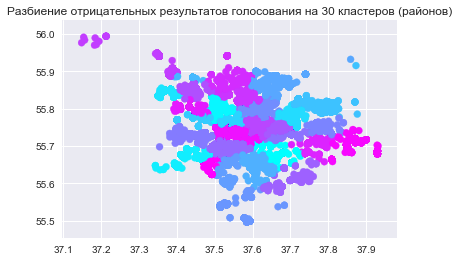

In [104]:
clusters = KMeans(n_clusters = 30).fit_predict(negative_X_scaled)
plt.scatter(negative_X['x'], negative_X['y'], c = clusters, cmap ='cool');
plt.title('Разбиение отрицательных результатов голосования на 30 кластеров (районов)');